РК№2 Вариант 2 Линейная/логистическая регрессия Случайный лес
Гапеева О.Р. ИУ5-61Б

In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import *
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
%matplotlib inline 
sns.set(style="ticks")

Загрузка данных

Преобразование наборов данных Scikit-learn в Pandas Dataframe

In [5]:
def make_dataframe(ds_function):
    ds = ds_function()
    df = pd.DataFrame(data= np.c_[ds['data'], ds['target']],
                     columns= list(ds['feature_names']) + ['target'])
    return df
    
data = make_dataframe(load_wine)

In [6]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


Категориальных признаков нет, значит, ничего не кодируем

In [7]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

alcohol - 0
malic_acid - 0
ash - 0
alcalinity_of_ash - 0
magnesium - 0
total_phenols - 0
flavanoids - 0
nonflavanoid_phenols - 0
proanthocyanins - 0
color_intensity - 0
hue - 0
od280/od315_of_diluted_wines - 0
proline - 0
target - 0


Маштабирование данных

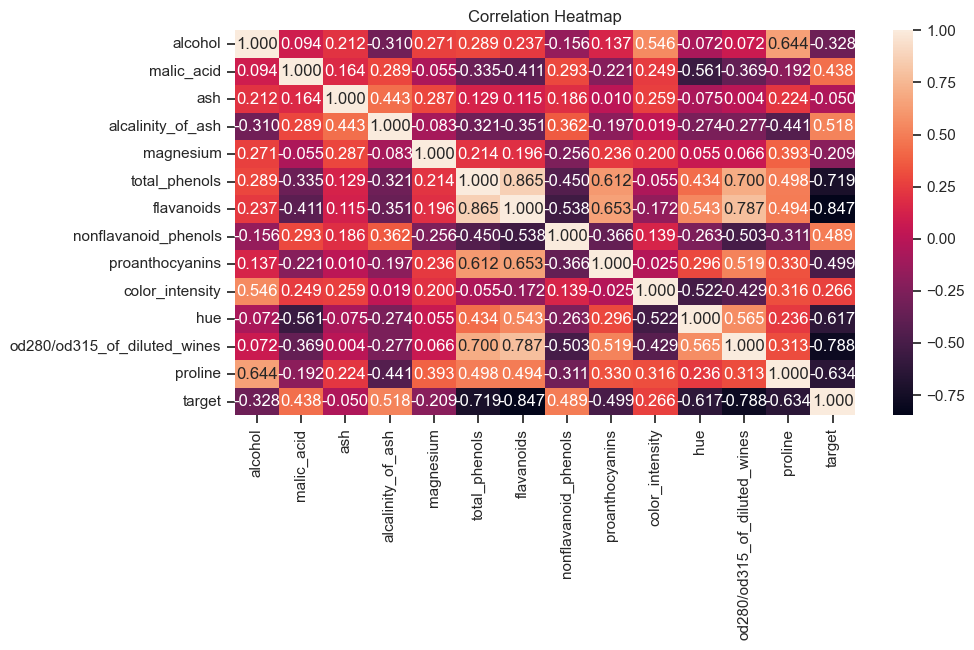

In [8]:
# Масштабирование данных
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Построение тепловой карты корреляции
plt.figure(figsize=(10, 5))
sns.heatmap(data.corr(method='pearson'), annot=True, fmt='.3f')
plt.title('Correlation Heatmap')
plt.show()

Линейная регрессия целевого признака Target

In [9]:

# Определение признаков и целевой переменной
X = data.drop(columns=['target']) 
y = data['target'] 

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Создание и обучение модели линейной регрессии
lr = LinearRegression()
lr.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred_lr = lr.predict(X_test)

# Оценка модели
mae = mean_absolute_error(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

print(f"Модель линейной регрессии:")
print(f"Среднеквадратичная ошибка (MSE) = {mse}")
print(f"Средняя абсолютная ошибка (MAE) = {mae}")
print(f"Коэффициент детерминации (R²) = {r2}")

Модель линейной регрессии:
Среднеквадратичная ошибка (MSE) = 0.06853348464256069
Средняя абсолютная ошибка (MAE) = 0.20304725956613057
Коэффициент детерминации (R²) = 0.8825140263270388


MAE  дает представление о том, насколько далеко от истинных значений находятся предсказания модели.
MSE чувствительна к большим ошибкам, что может быть полезно в некоторых случаях.
R² позволяет оценить, насколько хорошо модель объясняет данные, и является популярной метрикой для оценки качества регрессионных моделей.
Эти метрики вместе дают комплексное представление о качестве вашей модели линейной регрессии, позволяя оценить как абсолютную величину ошибок, так и степень, в которой модель объясняет вариабельность данных.

Случайный лес

In [12]:
# Создание и обучение модели случайного леса
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred_rf = rf.predict(X_test)

# Оценка модели
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

print(f"Модель случайного леса:")
print(f"Среднеквадратичная ошибка (MSE) = {mse}")
print(f"Средняя абсолютная ошибка (MAE) = {mae}")
print(f"Коэффициент детерминации (R²) = {r2}")

Модель случайного леса:
Среднеквадратичная ошибка (MSE) = 0.06483333333333333
Средняя абсолютная ошибка (MAE) = 0.09777777777777778
Коэффициент детерминации (R²) = 0.8888571428571428


Исходя из этих результатов, можно сделать вывод, что обе модели показали себя хорошо, мы получили практически идентичные результаты, модель случайного леса совсем на немного лучше модели линейной регрессии, наибольшее различие сдесь в метрике mse.